### Hypothesis
- 소득 수준이 비슷한 사람들은 비슷한 지역에 거주하며 군집을 이룰 것이다.
- 소득 수준이 높은 지역의 소매업과 요식업의 bill단가는 소득 수준이 낮은 지역에 비해 더 높을 것이다.

In [1]:
# jeju_financial_life_data.csv
data = pd.read_csv("../../01_jeju/codes/datas/jeju_financial_life_data.csv")
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 50)

In [3]:
# job_points 컬럼 추가: 직업군별 가중치
job_df = data[['job_majorc','job_smallc','job_public','job_profession','job_self','job_none','job_other']]
job_points = [100, 68, 92, 100, 60, 0, 50]

sum_list = []
for a in range(0, len(job_df)):
    row_sum = 0
    for i in range(0,7):
        row_sum += job_df.loc[a][i]*job_points[i]
    sum_list.append(round(row_sum,2))

data['job_points'] = sum_list

data.head()

,zip_cd,year_month,x_axis,y_axis,sex,age,job_majorc,job_smallc,job_public,job_profession,job_self,job_none,job_other,avg_income,med_income,avg_spend,avg_foreign_spend,avg_debt,avg_debt_credit,avg_debt_noneb,avg_debt_mortgage,avg_debt_deposit,avg_debt_collateral,avg_credit_rat,medium_resid_rat,large_resid_rat,vehicle_own_rat,job_points
0,63299,201902,126.565889,33.513210,1,54,0.0,0.166667,0.000000,0.000000,0.166667,0.500000,0.166667,37188000,33000000,2611619,0,24285196,11419148,8863595,55550000,0,55550000,5,-999999.0,-999999.0,0.000000,29.67
1,63560,201902,126.497121,33.247225,1,59,0.0,0.125000,0.000000,0.000000,0.375000,0.500000,0.000000,35378000,32000000,1987726,0,108571077,25896955,13317443,0,200000000,74421721,4,-999999.0,-999999.0,0.000000,31.00
2,63560,201902,126.497121,33.247225,2,49,0.0,0.250000,0.000000,0.000000,0.125000,0.625000,0.000000,32119000,34000000,3529667,172405,26424335,12015311,12015311,40833359,0,40833359,2,-999999.0,-999999.0,0.000000,24.50
3,63560,201902,126.497121,33.247225,1,54,0.0,0.181818,0.090909,0.090909,0.363636,0.272727,0.000000,64746000,68200000,4868477,12046,647716901,39952556,21558153,36697792,0,706300496,4,-999999.0,-999999.0,0.166667,51.64
4,63560,201902,126.497121,33.247225,1,49,0.0,0.250000,0.000000,0.000000,0.250000,0.500000,0.000000,29578000,29700000,5209689,0,248232725,35712501,5568751,0,0,626810674,5,-999999.0,-999999.0,0.000000,32.00


#### 1. job_points 구간을 나누어 표시

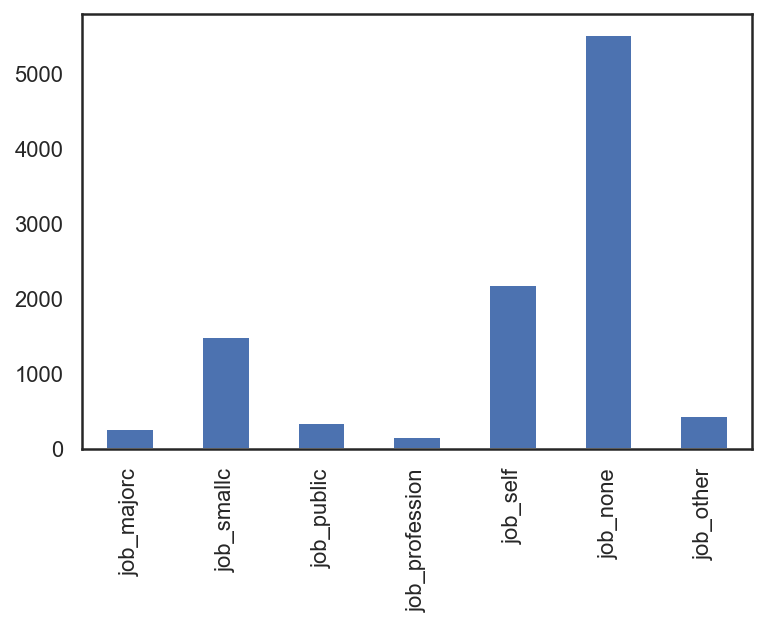

In [5]:
job_df.loc[0:].sum().plot.bar();

In [7]:
# 대기업/중소기업/공기업/전문직/자영업/무직/기타 순 비중
# 점수는 최대 100점
totalsum = job_df.iloc[0:].sum().sum()
a = [np.round(each/totalsum*100,2) for each in job_df.iloc[0:].sum()]
a

[2.57, 14.36, 3.28, 1.5, 21.03, 52.98, 4.28]

In [8]:
import plotly.express as px
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

In [23]:
# job_points의 4분위수 확인
# count    10422.000000
# mean        31.607145
# std         14.093122
# min          0.000000
# 25%         21.805000
# 50%         33.155000
# 75%         42.170000
# max         73.080000
fig = px.box(data['job_points'], y = 'job_points',width=400, height=500)
fig.show()

In [49]:
# 4분위수에 따라 4개 등급으로 분류
job_level = []
level = ['d', 'c', 'b', 'a']
q = [0.25, 0.5, 0.75, 1]

for i in range(0, len(data)):
    for index in range(0, 4):
        if data['job_points'].loc[i] <= data['job_points'].quantile(q[index]):
            job_level.append(level[index])
            break
job_level

['c',
 'c',
 'c',
 'a',
 'c',
 'c',
 'd',
 'b',
 'a',
 'a',
 'a',
 'c',
 'c',
 'd',
 'b',
 'a',
 'c',
 'b',
 'a',
 'd',
 'c',
 'c',
 'a',
 'a',
 'a',
 'c',
 'd',
 'b',
 'c',
 'a',
 'd',
 'a',
 'b',
 'a',
 'b',
 'a',
 'b',
 'a',
 'd',
 'a',
 'a',
 'a',
 'a',
 'a',
 'd',
 'a',
 'd',
 'a',
 'd',
 'c',
 'a',
 'd',
 'a',
 'b',
 'a',
 'd',
 'c',
 'a',
 'c',
 'b',
 'a',
 'b',
 'c',
 'c',
 'b',
 'd',
 'c',
 'b',
 'b',
 'a',
 'd',
 'd',
 'd',
 'd',
 'b',
 'b',
 'd',
 'a',
 'b',
 'b',
 'd',
 'c',
 'b',
 'a',
 'b',
 'b',
 'a',
 'a',
 'a',
 'a',
 'c',
 'b',
 'b',
 'b',
 'a',
 'c',
 'd',
 'b',
 'd',
 'c',
 'd',
 'b',
 'a',
 'b',
 'd',
 'd',
 'c',
 'c',
 'a',
 'b',
 'd',
 'a',
 'b',
 'b',
 'd',
 'c',
 'c',
 'a',
 'd',
 'c',
 'b',
 'd',
 'a',
 'c',
 'b',
 'd',
 'c',
 'c',
 'a',
 'a',
 'a',
 'c',
 'c',
 'b',
 'a',
 'c',
 'b',
 'a',
 'c',
 'd',
 'd',
 'b',
 'd',
 'b',
 'a',
 'a',
 'c',
 'c',
 'c',
 'd',
 'b',
 'a',
 'b',
 'a',
 'b',
 'a',
 'd',
 'c',
 'c',
 'b',
 'c',
 'd',
 'c',
 'b',
 'a',
 'd',
 'd'

In [50]:
len(job_level)

10422

In [52]:
# data 데이터 프레임에 job level 컬럼 추가
data['job_level'] = job_level
data[['job_level','job_points']].head()

,job_level,job_points
0,c,29.67
1,c,31.00
2,c,24.50
3,a,51.64
4,c,32.00


In [99]:
# 피벗1: job_level에 따른 age, job_points, sex (zip_cd는 개수 확인용)
job_lv_pivot = pd.pivot_table(data,
                             index = ['job_level'],
                             values = ['job_points','age','sex','zip_cd'],
                              aggfunc={'job_points':'mean','age':'mean','sex':'mean','zip_cd':'median','zip_cd':'count'},
                             )
job_lv_pivot

,age,job_points,sex,zip_cd
job_level,,,,
a,49.507302,48.624170,1.147194,2602
b,50.780376,37.608291,1.514373,2609
c,55.332054,28.101298,1.669482,2605
d,59.439371,12.112686,1.638910,2606


In [115]:
job_lv_pivot['age']

job_level
a    49.507302
b    50.780376
c    55.332054
d    59.439371
Name: age, dtype: float64

In [173]:
# job_points과 age는 반비례
# job_points가 높을 수록 남성 비율이 높다
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.05, x_title='Job points')
fig.add_trace(go.Scatter(name='Age', x = job_lv_pivot['job_points'], y = job_lv_pivot['age']), row = 1, col =1)
fig.add_trace(go.Scatter(name='Sex\n(Male:1,Female:2)',x = job_lv_pivot['job_points'], y = job_lv_pivot['sex']), row = 2, col =1)
fig.update_layout(height=400, width=700, title_text="<Correlation between Job points and Age/Sex>")
fig.show()

In [131]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
level = ['a','b','c','d']
fig = make_subplots(rows=1, cols=3,
                    subplot_titles=("age", "job points", "sex"))
fig.add_trace(go.Scatter(x = job_lv_pivot['job_points'], y = job_lv_pivot['age']), row = 1, col =1)
fig.add_trace(go.Box(y = data['job_points']), row = 1, col =2)
fig.add_trace(go.Scatter(x = job_lv_pivot['job_points'], y = job_lv_pivot['sex']), row = 1, col =3)
fig.update_layout(height=400, width=600, title_text="<직업 레벨 간의 상관관계>")
fig.show()

In [56]:
# 피벗2 : job_level에 따른 직업군 비중
job_lv_pivot2 = pd.pivot_table(data,
                             index = ['job_level'],
                             values = ['job_majorc','job_smallc','job_public','job_profession','job_self','job_none','job_other'],
                             margins=True)
job_lv_pivot2

,job_majorc,job_none,job_other,job_profession,job_public,job_self,job_smallc
job_level,,,,,,,
a,0.050638,0.294735,0.057838,0.021196,0.069354,0.281993,0.224245
b,0.030971,0.440448,0.056593,0.019420,0.036698,0.239474,0.176396
c,0.016704,0.571248,0.042870,0.013777,0.018977,0.214131,0.122294
d,0.004455,0.812635,0.014007,0.005564,0.006216,0.105710,0.051414
All,0.025685,0.529827,0.042825,0.014988,0.032800,0.210307,0.143568


In [77]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [179]:
job_lv_pivot2[:4]

,job_majorc,job_none,job_other,job_profession,job_public,job_self,job_smallc
job_level,,,,,,,
a,0.050638,0.294735,0.057838,0.021196,0.069354,0.281993,0.224245
b,0.030971,0.440448,0.056593,0.019420,0.036698,0.239474,0.176396
c,0.016704,0.571248,0.042870,0.013777,0.018977,0.214131,0.122294
d,0.004455,0.812635,0.014007,0.005564,0.006216,0.105710,0.051414


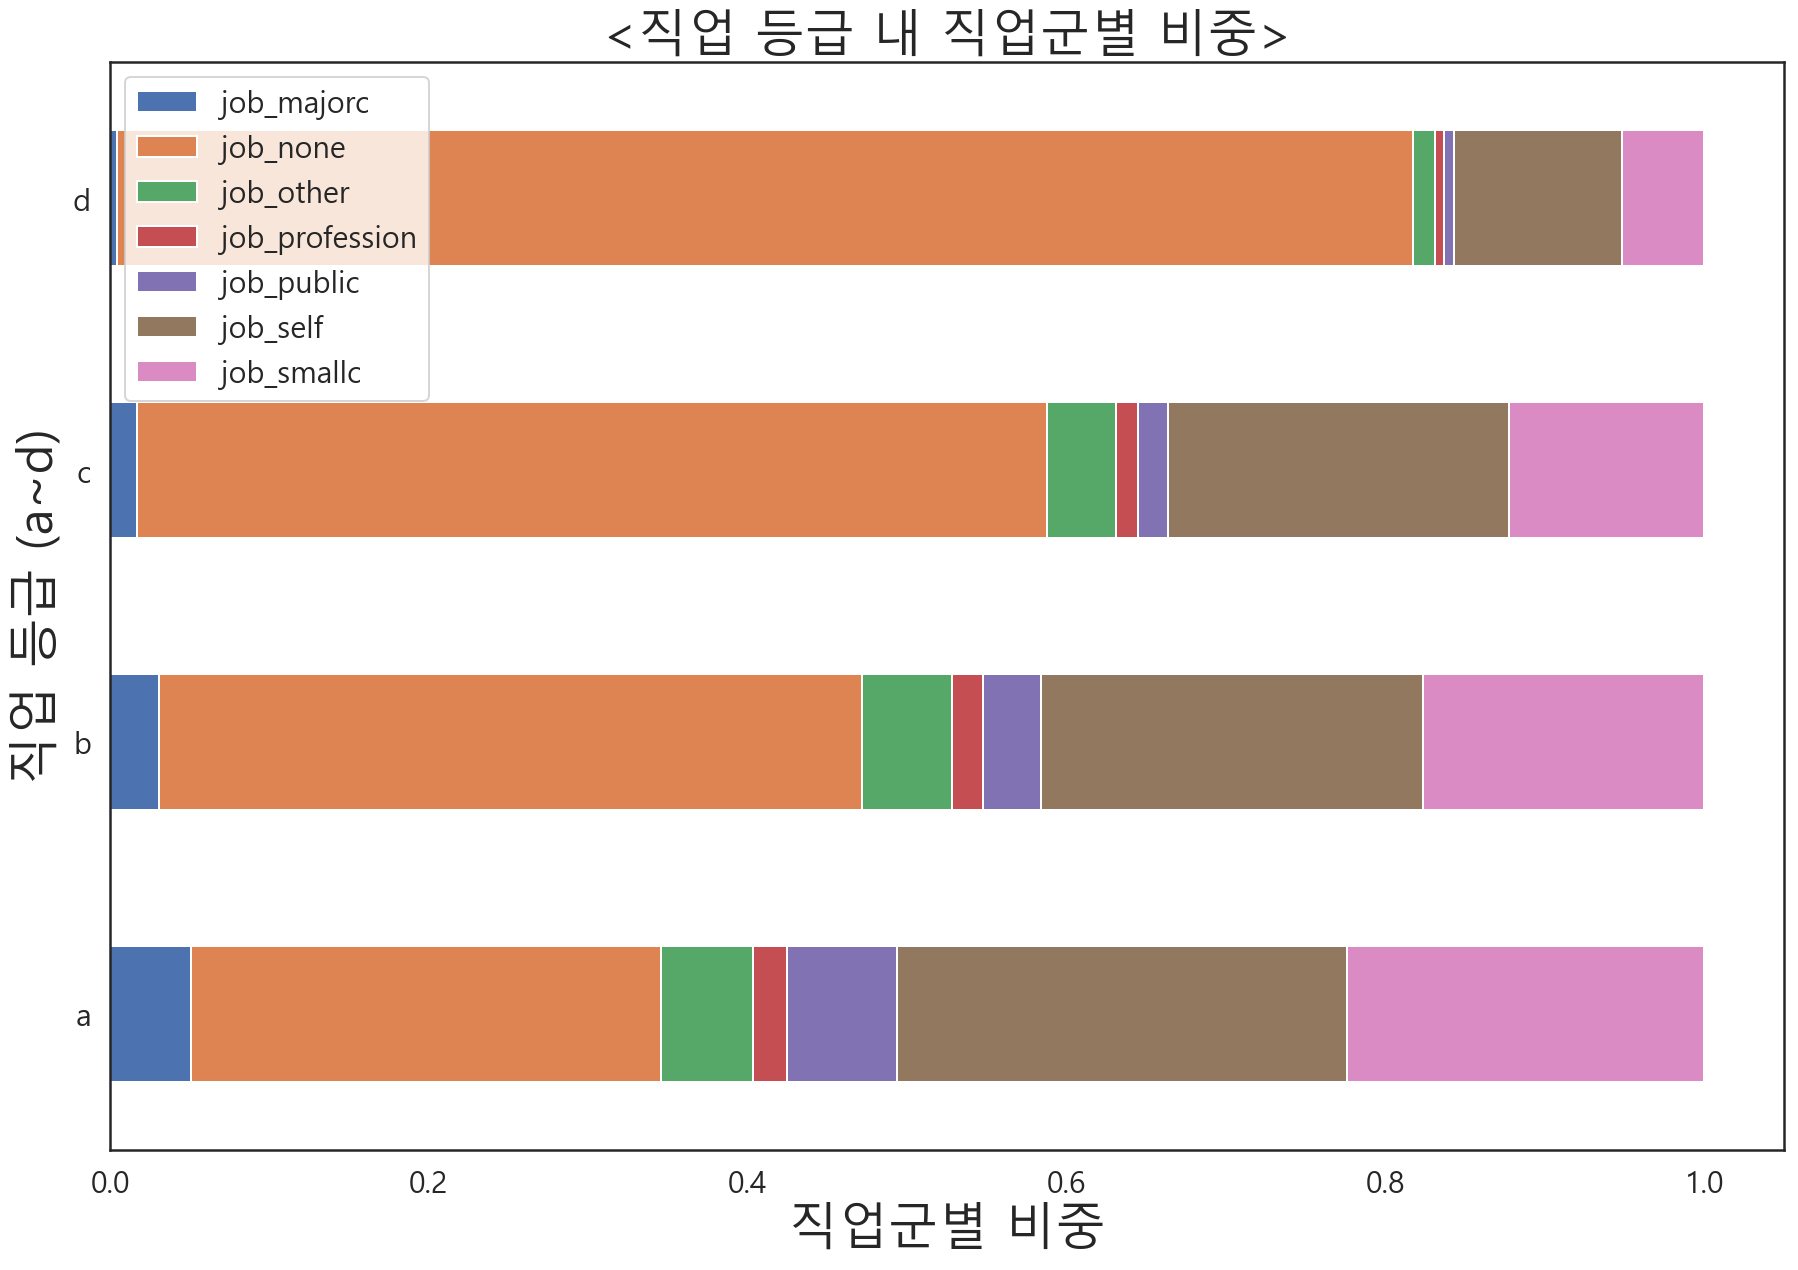

In [183]:
job_bar_fig = job_lv_pivot2[:4].plot.barh(stacked=True)
plt.title('<직업 등급 내 직업군별 비중>',fontsize=25)
plt.rcParams["figure.figsize"] = (15,10)
plt.ylabel('직업 등급 (a~d)',fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

★ bar chart 예쁘게 그리는 법 연구중..수정 예정

In [220]:
# job_level 별 산점도
# 모든 항목이 해안가를 둘러싸고 거주중
# 방법을 고민중인데..아마도 한라산(제주도 가운데)을 기점으로
# 해안가 지점까지의 직선 거리 변환을 해서 2d scatter를 그릴 수 있지 않을까?
px.scatter_3d(data, x = "x_axis", y = "y_axis", z= 'job_points', size='job_points', color='job_level', size_max = 10)

In [198]:
# 등급별 지도에 표시
scatter_a = px.scatter(data[data['job_level']=='a'], x = "x_axis", y = "y_axis", size='job_points', size_max = 10)
scatter_a.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'scatter3d'

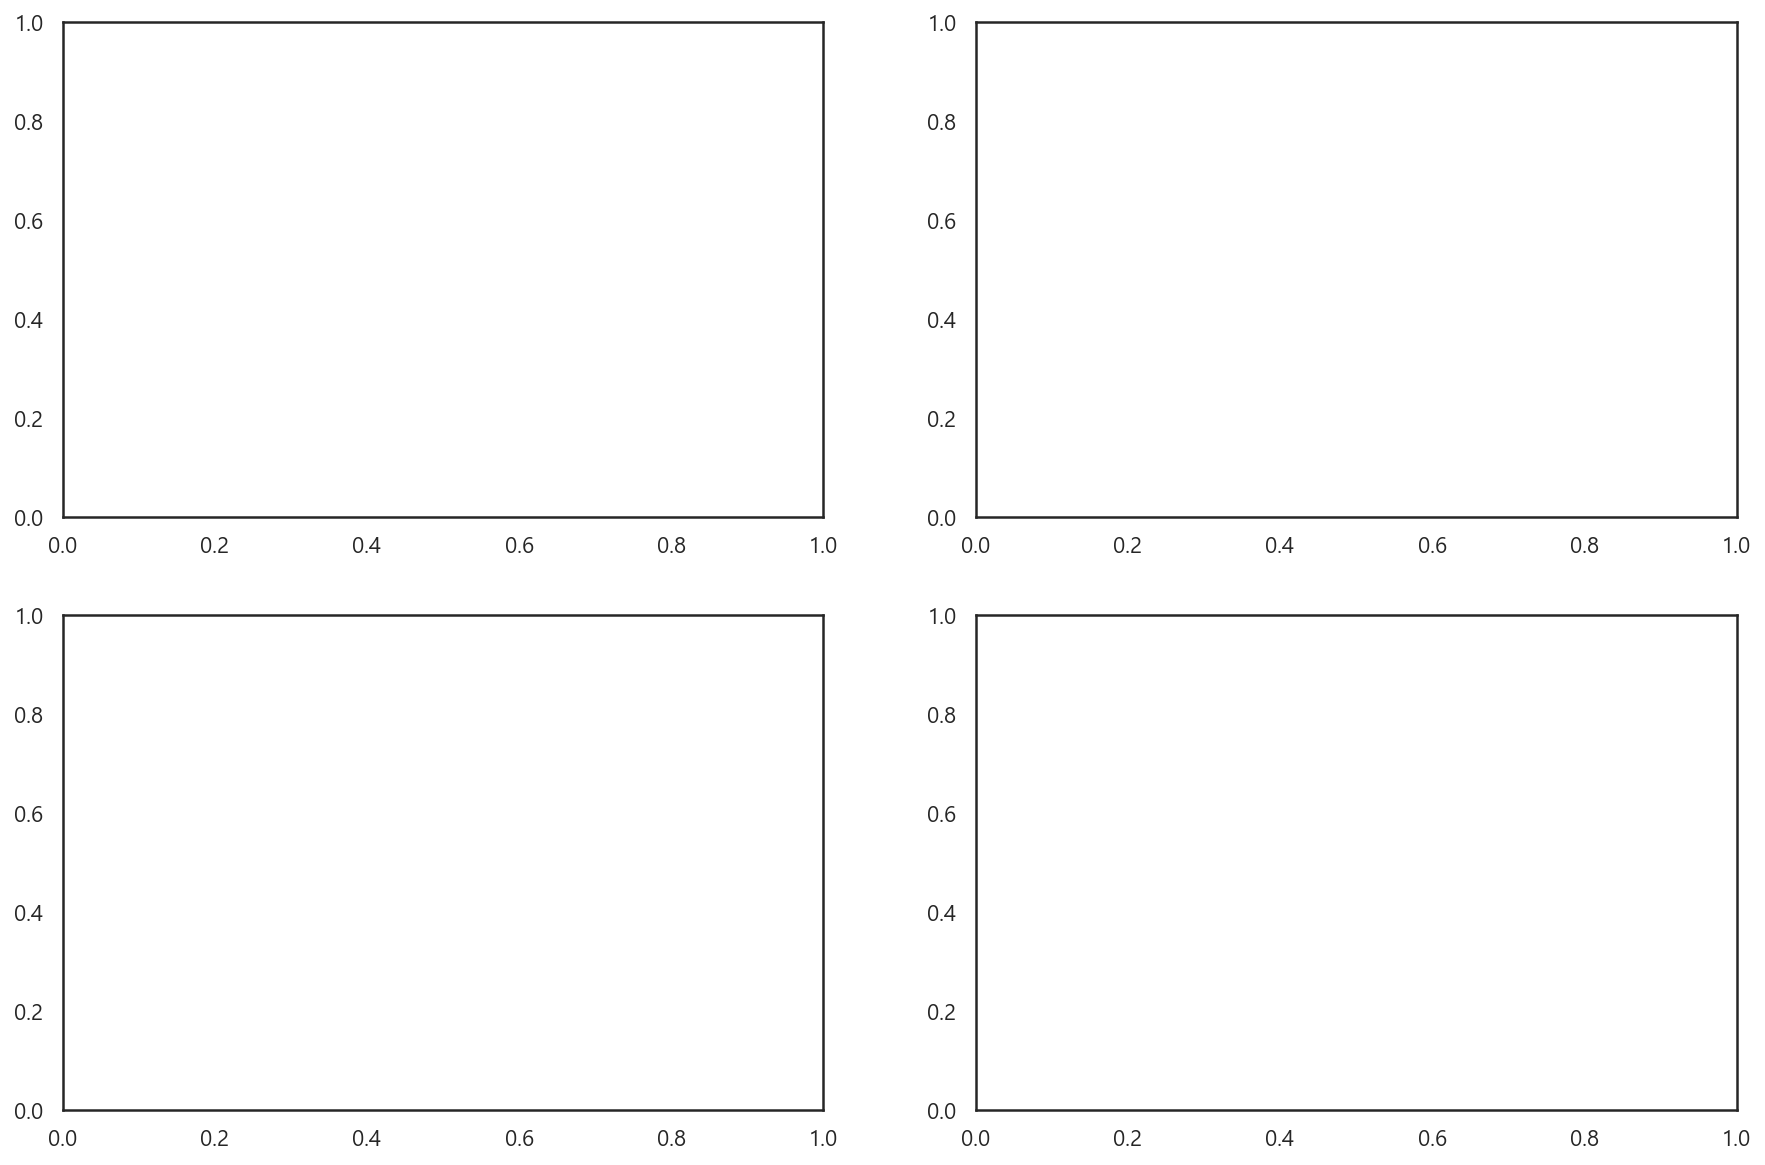

In [219]:
★ 평면도 scatter 4개를 subplots로 할 수는 없을까요..?
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0] = plt.scatter3d(x = "x_axis", y = "y_axis", s='job_points')
ax[1] = scatter_b

In [210]:
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'type': 'ternary'}, {'type': 'ternary'}],
           [{'type': 'ternary'}, {'type': 'ternary'}]])
fig.add_trace(go.Scatter3d(x = data["x_axis"], y = data["y_axis"], z=data[data['job_level']=='a'], row=1,col=1)
fig.add_trace(go.Scatter3d(x = data["x_axis"], y = data["y_axis"], z=data[data['job_level']=='b'], row=1,col=2)
fig.add_trace(go.Scatter3d(x = data["x_axis"], y = data["y_axis"], z=data[data['job_level']=='c'], row=2,col=1)
fig.add_trace(go.Scatter3d(x = data["x_axis"], y = data["y_axis"], z=data[data['job_level']=='d'], row=2,col=2)
fig.show()

SyntaxError: invalid syntax (<ipython-input-210-a0e929134e93>, line 6)

In [212]:
scatter_b = px.scatter(data[data['job_level']=='b'], x = "x_axis", y = "y_axis", size='job_points', size_max = 10)
scatter_b.show()

In [213]:
scatter_c = px.scatter(data[data['job_level']=='c'], x = "x_axis", y = "y_axis", size='job_points', size_max = 10)
scatter_c.show()

In [214]:
scatter_d = px.scatter(data[data['job_level']=='d'], x = "x_axis", y = "y_axis", size='job_points', size_max = 10)
scatter_d.show()